# Introduction to Python and Natural Language Technologies
## Lecture 06, NLP Introduction

March 16, 2020

Ádám Kovács

This lecture aims to give an introduction to the main concepts of NLP and word representations.

## Preparation

[Download GLOVE](http://sandbox.hlt.bme.hu/~adaamko/glove.6B.100d.txt)

In [1]:
!pip install spacy

!pip install textacy

!pip install flair

!pip install gensim

!pip install -U scikit-learn

!python -m spacy download en

  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
  Using cached flair-0.8.0.post1-py3-none-any.whl (284 kB)
  Using cached ftfy-5.9.tar.gz (66 kB)
  Using cached konoha-4.6.4-py3-none-any.whl (19 kB)
  Using cached bpemb-0.3.2-py3-none-any.whl (19 kB)
     |████████████████████████████████| 965 kB 2.0 MB/s eta 0:00:01


  Using cached scikit_learn-0.24.1-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textacy 0.10.1 requires scikit-learn<0.24.0,>=0.19.0, but you have scikit-learn 0.24.1 which is incompatible.
     |████████████████████████████████| 12.0 MB 45.9 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/fatima/anaconda3/lib/python3.8/site-packages/en_core_web_sm -->
/home/fatima/anaconda3/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


## NLP Tasks

### Why do we need NLP?

    - Make the computer understand text
    - Extract useful information from it
    - A collection that helps us processing huge amount of texts
    - We have two directions:
        - Analysis: Convert text to a structural representation
        - Generation: Generate text from formal representation

### Tasks most people would think of

- Spellchecking

- Machine translation

- Chatbots

these are not an exhaustive list

### "Real" tasks?

- Basic NLP tasks (but very important):
    - tokenization
    - lemmatization
    - POS tagging
    - syntactic parsing
   

- More semantic tasks:
    - summarization
    - question answering
    - information extraction (e.g. NER tagging)
    - relation extraction 
    - chatbots
    - machine translation
    - ...

## Spacy

- For demonstrating NLP tasks, we are going to use the library [spacy](https://spacy.io/) a lot.
- It is an open-source NLP library for Python
- It features a lot of out-of-the-box models for NLP
- NER, POS tagging, dependency parsing, vectorization...

In [12]:
import spacy
from spacy import displacy

#loading the english model
nlp = spacy.load('en_core_web_sm')

## Basic preprocessing tasks, text normalization

<h3 id="Tokenization">Tokenization</h3>
<ul>
<li>Splitting text into words, sentences, documents, etc..</li>
<li>One of the goals of tokenizing text into words is to create a <strong>vocabulary</strong></li>
</ul>
<p><em>Muffins cost <strong>$3.88</strong> in New York. Please buy me two as I <strong>can't</strong> go. <strong>They'll</strong> taste good. I'm going to <strong>Finland's</strong> capital to hear about <strong>state-of-the-art</strong> solutions in NLP.</em></p>

- $3.88 - split on the period?
- can't - can not?
- They'll - they will?
- Finland's - Finland?
- state-of-the-art?

In [3]:
sens = "Muffins cost $3.88 in New York. Please buy me two as I can't go." \
" They'll taste good. I'm going to Finland's capital to hear about state-of-the-art solutions in NLP."

print(sens.split())

print(len(sens.split()))


['Muffins', 'cost', '$3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'as', 'I', "can't", 'go.', "They'll", 'taste', 'good.', "I'm", 'going', 'to', "Finland's", 'capital', 'to', 'hear', 'about', 'state-of-the-art', 'solutions', 'in', 'NLP.']
29


In [4]:
sens = "Muffins cost $3.88 in New York. Please buy me two as I can't go." \
" They'll taste good. I'm going to Finland's capital to hear about state-of-the-art solutions in NLP."

doc = nlp(sens)

tokens = [token.text for token in doc]
print(tokens)

['Muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'as', 'I', 'ca', "n't", 'go', '.', 'They', "'ll", 'taste', 'good', '.', 'I', "'m", 'going', 'to', 'Finland', "'s", 'capital', 'to', 'hear', 'about', 'state', '-', 'of', '-', 'the', '-', 'art', 'solutions', 'in', 'NLP', '.']


In [5]:
for sen in doc.sents:
    print(sen)

Muffins cost $3.88 in New York.
Please buy me two as I can't go.
They'll taste good.
I'm going to Finland's capital to hear about state-of-the-art solutions in NLP.


In [6]:
for token in doc:
    print(token.text, token.is_alpha, token.is_stop)

Muffins True False
cost True False
$ False False
3.88 False False
in True True
New True False
York True False
. False False
Please True True
buy True False
me True True
two True True
as True True
I True True
ca True True
n't False True
go True True
. False False
They True True
'll False True
taste True False
good True False
. False False
I True True
'm False True
going True False
to True True
Finland True False
's False True
capital True False
to True True
hear True False
about True True
state True False
- False False
of True True
- False False
the True True
- False False
art True False
solutions True False
in True True
NLP True False
. False False


### Lemmatization, stemming

- The goal of lemmatization is to find the dictionary form of the words
- Called the "lemma" of a word
- _dogs_ -> _dog_ , _went_ -> _go_
- Ambiguity plays a role: _saw_ -> _see_?
- Needs POS tag to disambiguate

In [7]:
doc = nlp("I saw two dogs yesterday.")

lemmata = [token.lemma_ for token in doc]
print(lemmata)

['-PRON-', 'see', 'two', 'dog', 'yesterday', '.']


### POS tagging

- Words can be groupped into grammatical categories.
- These are called the Part Of Speech tags of the words.
- Words belonging to the same group are interchangable
- Ambiguity: _guard_ ?


In [8]:
doc = nlp("The white dog went to play football yesterday.")

[token.pos_ for token in doc]

['DET', 'ADJ', 'NOUN', 'VERB', 'PART', 'VERB', 'NOUN', 'NOUN', 'PUNCT']

<h3 id="Morphological-analysis">Morphological analysis</h3>
<ul>
<li>Splitting words into morphemes</li>
<li>Morphemes are the smallest meaningful units in a language (part of the words)</li>
<li>friend<span style="color: #e03e2d;">s</span>, wait<span style="color: #e03e2d;">ing</span>, friend<span style="color: #e03e2d;">li</span><span style="color: #3598db;">er</span></li>
<li>Tagging them with morphological tags</li>
<li>Ambiguity: <em>v&aacute;rnak</em></li>
</ul>

In [10]:
doc = nlp("Yesterday I went to buy two dogs")
nlp.vocab.morphology.tag_map[doc[-1].tag_]

{74: 92, 'Number_plur': True}

## Advanced tasks

### Syntactic parsing


-  *Colorless green ideas sleep furiously.* 

- *Furiously sleep ideas green colorless.*

Chomsky (1956)


Two types.
- Phrase structure grammar
- __Dependency grammar__


### Universal Dependency Parsing
- Started and standardized in the [UD](http://universaldependencies.org/) project.
- The types are Language-independent
- The annotations are trying to be consistent accross 70+ languages

In [11]:
doc = nlp("Colorless green ideas sleep furiously")
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})

### Named entity recognition

- Identify the present entities in the text

In [12]:
sens = "Muffins cost $3.88 in New York. Please buy me two as I can't go." \
" They'll taste good. I'm going to Finland's capital to hear about state-of-the-art solutions in NLP."

doc = nlp(sens)
for ent in doc.ents:
    print(ent)

    
displacy.render(doc, style='ent', jupyter=True)

3.88
New York
two
Finland
NLP


### Language modelling

- One of the most important task in NLP
- The goal is to compute the "probability" of a sentence
- Can be used in:
    - Machine Translation
    - Text generation
    - Correcting spelling
    - Word vectors?
- P(the quick brown __fox__) > P(the quick brown __stick__)

In [1]:
!pip install --upgrade pip
!pip install tensorflow


#!pip install transformers
#from transformers import pipeline

#text_generator = pipeline("text-generation")
#print(text_generator("The quick brown ", max_length=10, do_sample=False))

In [20]:
!pip install transformers


In [26]:
from transformers import pipeline

text_generator = pipeline("text-generation")
#print(text_generator("The quick brown ", max_length=10, do_sample=False))

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

## Semantic tasks

### Summarization

In [25]:
summarizer = pipeline("summarization")
summarizer("Deep learning is used almost exclusively in a Linux environment.\
You need to be comfortable using the command line if you are serious about deep learning and NLP.\
    Most NLP and deep learning libraries have better support for Linux and MacOS than Windows. \
    Most papers nowadays release the source code for their experiments with Linux support only.",
           min_length=5)

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

### Sentiment Analysis
- In the simplest case, decide whether a text is negative or positive.

In [ ]:
sentiment = pipeline("sentiment-analysis")
sentiment(['This class is really cool! I would recommend this to anyone!'])

### Question Answering

- Given a context and a question choose the right answer
- Can be extractive or abstractive

In [ ]:
question_answerer = pipeline('question-answering')
question_answerer({
    'question': 'Who went to the store ?',
    'context': 'Adam went to the store yesterday.'})

### <center>Lexical Inference, Natural Language Inference</center>



<div class="frame">

| **entailment**                                                |     |     |
|:--------------------------------------------------------------|:----|:----|
| A young family enjoys feeling ocean waves lap at their feet.  |     |     |
| A family is at the beach                                      |     |     |
| **contradiction**                                             |     |     |
| There is no man wearing a black helmet and pushing a bicycle  |     |     |
| One man is wearing a black helmet and pushing a bicycle       |     |     |
| **neutral**                                                   |     |     |
| An old man with a package poses in front of an advertisement. |     |     |
| A man poses in front of an ad for beer.                       |     |     |

</div>

### Machine Comprehension

- https://demo.allennlp.org/reading-comprehension

### Machine translation

In [ ]:
translation = pipeline("translation_en_to_de")
text = "I like to study Data Science and Machine Learning"
translated_text = translation(text, max_length=40)[0]['translation_text']
print(translated_text)

### Chatbots

In [ ]:
#!pip install chatbotAI
from chatbot import demo
demo()

## Demos
    - http://e-magyar.hu/hu/parser
    - https://demo.allennlp.org/
    - https://talktotransformer.com/
    - [GPT-3](https://github.com/elyase/awesome-gpt3) (*has 175B parameters*)

## Representations

To be able to run machine learning algorithms the computer needs numerical representations. For natural text input this means we need a mapping that converts strings to a numerical represenatation. **one-hot encoding** is the easiest approach where we map each word to an integer id.


In [2]:
sentence = "yesterday the lazy dog went to the store to buy food"

In [3]:
mapping = dict()
max_id = 0

for word in sentence.split():
    if word not in mapping:
        mapping[word] = max_id
        max_id = max_id + 1
        
print(mapping)

{'yesterday': 0, 'the': 1, 'lazy': 2, 'dog': 3, 'went': 4, 'to': 5, 'store': 6, 'buy': 7, 'food': 8}


### Load matplotlib and pandas

In [4]:
import os
import pandas as pd
import re

# Data analysis

- we use nlp frameworks for the basic tasks
- for the preprocessing tasks (lemmatization, tokenization) we use [spaCy](https://spacy.io/)
- for keyword extraction and various text analyzation tasks we use [textacy](https://github.com/chartbeat-labs/textacy)
- textacy builds on spaCy output
- both are open source python libraries

<p><strong>AG_NEWS</strong> classes:</p>
<ul>
<li>
<p>World - <em>Venezuela Prepares for Chavez Recall Vote</em></p>
</li>
<li>
<p>Sports - <em>Johnson Back to His Best as D-Backs End Streak</em></p>
</li>
<li>
<p>Business - <em>Intel to delay product aimed for high-definition TVs</em></p>
</li>
<li>
<p>Sci/Tech - <em>China's Red Flag Linux to focus on enterprise</em></p>
</li>
</ul>

In [7]:
!pip install torchtext==0.4
NGRAMS = 2
from torchtext import data
from torchtext.datasets import text_classification
import os
if not os.path.isdir('./data'):
    os.mkdir('./data')
text_classification.DATASETS['AG_NEWS'](
    root='./data', ngrams=NGRAMS, vocab=None)

     |████████████████████████████████| 53 kB 62 kB/s  eta 0:00:01


ag_news_csv.tar.gz: 11.8MB [00:02, 4.36MB/s]
120000lines [00:13, 9162.98lines/s]
120000lines [00:23, 5077.35lines/s]
7600lines [00:01, 5297.87lines/s]


(<torchtext.datasets.text_classification.TextClassificationDataset at 0x7f129f619e20>,
 <torchtext.datasets.text_classification.TextClassificationDataset at 0x7f129f5f9760>)

In [8]:
train_data = pd.read_csv("./data/ag_news_csv/train.csv",quotechar='"', names=['label', 'title', 'description'])
test_data = pd.read_csv("./data/ag_news_csv/test.csv",quotechar='"', names=['label', 'title', 'description'])

In [9]:
train_data.head()

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [10]:
train_data.label.value_counts()

4    30000
3    30000
2    30000
1    30000
Name: label, dtype: int64

In [13]:
text_sports = train_data[train_data.label == 2]

text = " ".join(text_sports.title.tolist()) # join all the components in text_sports into a big string
doc_text = nlp(text[:200000]) # run Spacy on the big string

In [14]:
import textacy
from textacy.extract import ngrams
from collections import Counter

Counter([ng.text.lower() for n in [2,4] for ng in ngrams(doc_text, n)]).most_common(10)
# most_common() in order to print out the most common ngram (in this case is n=2, a group of two words usually used together)

[('red sox', 46),
 ('nl wrap', 40),
 ('gold medal', 40),
 ('world cup', 33),
 ('ryder cup', 31),
 ('al wrap', 25),
 ('white sox', 24),
 ('kobe bryant', 23),
 ('team report', 21),
 ('u.s. open', 21)]

In [15]:
from textacy.ke import textrank # textrank: to get the most important concept in a word

textrank(
    doc_text,
    normalize = "lemma",
    window_size=2, edge_weighting="binary", position_bias=False
)


[('record sixth olympic diving gold medal Slesarenko Strikes Gold Losing run',
  0.01183391666528019),
 ('Games Gold Binge U.S. Wins Sailing Gold Equestrian Medal Overturned Phelps',
  0.010941432455239743),
 ('Kiwi gold Super Saturday Arsenal win thriller', 0.010914927547145643),
 ('nesterenko win Sprint gold', 0.01019445623053206),
 ('fourth Gold Ainslie clinch Finn gold Olympic Games', 0.00977948688922309),
 ('gold dream gold', 0.008858103117735803),
 ('Olympics gold medal winner Federer', 0.00844335354995614),
 ('win Toronto Blue Jays Team Report', 0.008222057979792936),
 ('Fabulous Felix german woman Grab Hockey Gold American Dwight Phillips Captures Long Jump Gold NCAA',
  0.008072903393520344),
 ('good win man u bid', 0.007982809673619098)]

In [16]:
textrank(
    doc_text,
    window_size=10, edge_weighting="count", position_bias=False
)

[('record sixth olympic diving gold medal Slesarenko Strikes Gold Losing run',
  0.014302772644821592),
 ('Kiwi gold Super Saturday Arsenal win thriller', 0.013483172307126604),
 ('nesterenko win Sprint gold', 0.012879870057645973),
 ('Games Gold Binge U.S. Wins Sailing Gold Equestrian Medal Overturned Phelps',
  0.012847449013871526),
 ('AP', 0.012545802631352396),
 ('gold dream gold', 0.012300083402040644),
 ('fourth Gold Ainslie clinch Finn gold Olympic Games', 0.01196383143356531),
 ('Olympics gold medal winner Federer', 0.011217678718954618),
 ('Athens Olympics Tourists award gold', 0.010504370864526096),
 ('win Toronto Blue Jays Team Report', 0.010266207635133714)]

In [17]:
import math
from collections import Counter 
words = [tok for tok in doc_text if tok.is_alpha and not tok.is_stop]
word_probs = {tok.text.lower(): tok.prob for tok in words}

freqs = Counter(tok.text for tok in words)

     |████████████████████████████████| 371 kB 1.8 MB/s eta 0:00:01
7110


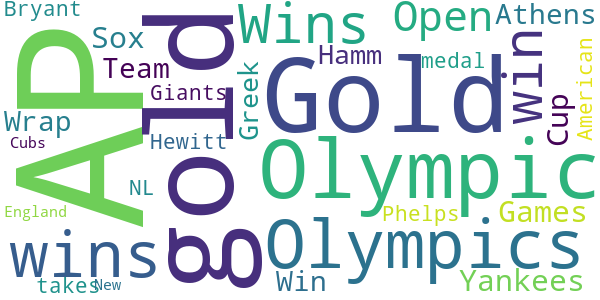

In [18]:
# JUST FOR FUN:
!pip install wordcloud
from wordcloud import WordCloud
print(len(freqs))
wordcloud = WordCloud(background_color="white", max_words=30, scale=1.5).generate_from_frequencies(freqs)
image = wordcloud.to_image()
image.save("./wordcloud.png")

from IPython.display import Image 
Image(filename='./wordcloud.png')

## Building a classficiation pipeline

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above. It is used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.


In [19]:
!pip install torchtext==0.4
!pip install torch
!pip install gensim
!pip install scikit-learn

In [20]:
NGRAMS = 2
from torchtext import data
from torchtext.datasets import text_classification
import os
if not os.path.isdir('./data'):
    os.mkdir('./data')
text_classification.DATASETS['AG_NEWS'](
    root='./data', ngrams=NGRAMS, vocab=None)

120000lines [00:12, 9692.66lines/s]
120000lines [00:23, 5201.81lines/s]
7600lines [00:01, 5275.53lines/s]


(<torchtext.datasets.text_classification.TextClassificationDataset at 0x7f128f639250>,
 <torchtext.datasets.text_classification.TextClassificationDataset at 0x7f1270e7dfd0>)

In [21]:
#Import the needed libraries
from tqdm import tqdm
from sklearn.model_selection import train_test_split as split
import numpy as np

Now we use pandas to read in the dataset into a DataFrame. We are also going to just take a fraction of the dataset to be more efficient.

In [39]:
#1-World, 2-Sports, 3-Business, 4-Sci/Tech
train_data = pd.read_csv("./data/ag_news_csv/train.csv",quotechar='"', names=['label', 'title', 'description'])
test_data = pd.read_csv("./data/ag_news_csv/test.csv",quotechar='"', names=['label', 'title', 'description'])

In [40]:
train_data = train_data.groupby('label').apply(lambda x: x.sample(frac=0.2, random_state=1234)).sample(frac=1.0)
# only a fraction of the train_Data set used for training (in our case, it is machine learning => 
# no need for big dataset); The teacher uses only 20% (frac=0.2) of the dataset for train_data.
# Setting the random_state=1234 will make every time we run this code after the extracting step (the above cell), the chosen dataset does not change.
# andom_state=1234 will prevent us from runing this code again without runing the extracting step before it. 
# 'sample(frac=..)' randomly shuffle the dataset for us in order to prevent the same lables are next to each other which hinders the learning ability of the machine.
train_data 

label                                              title  \
label                                                                    
1     105364      1  Romania Opposition Sees Fraud, Demands Poll Rerun   
2     5688        2                             U.S. Wins Sailing Gold   
3     75593       3                         Fewer Pledge to Swap Votes   
4     4950        4                     Brazil tribe prove words count   
1     43515       1  Australian Labor to Raise Pensions, Fund Grand...   
...             ...                                                ...   
3     7367        3  Singer  amp; Friedlander First-Half Net Slips ...   
2     103530      2                               Vick Rallies Falcons   
      15086       2          Former UConn Aide Pleads in Sex Case (AP)   
3     68841       3  Falconbridge Profit Rises Eightfold on Nickel ...   
2     30256       2                              FOOTBALL LIVE REPORTS   

                                                    description  
label                                                            
1     105364   BUCHAREST, Romania (Reuters) - Romania's cent...  
2     5688    Americans Paul Foerster and Kevin Burnham win ...  
3     75593   Thousands plan to take part this year in an on...  
4     4950    When it comes to counting, a remote Amazonian ...  
1     43515   Australia #39;s main opposition Labor Party le...  
...                                                         ...  
3     7367    Singer  amp; Friedlander Group Plc, a UK inves...  
2     103530  Michael Vick throws a 27-yard scoring pass to ...  
      15086   AP - The Connecticut assistant men's basketbal...  
3     68841   Falconbridge Ltd., the world #39;s third- bigg...  
2     30256   Patrick Kluivert eased Newcastle towards the g...  

[24000 rows x 3 columns]

We need a way of converting raw data to features! (FEATURES are the inputs for our machine learning algorithm! They are very important).
![features](https://developers.google.com/machine-learning/crash-course/images/RawDataToFeatureVector.svg)

_(image from [link](https://developers.google.com/machine-learning))_

The easiest way of converting raw data to features is called the [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) model.

In [42]:
from collections import defaultdict

word_to_ix = defaultdict(int)
for sent in train_data.title:
    for word in sent.split():
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
len(word_to_ix)  # eventhoug the size is already a fraction of the dataset, 30742 is still too big for the machine learning.
# the following cells demostrate better way to convert the dataset into features which are more suitable for
# out machine learning algorithms.

30742

We are going to use Python's machine learning library, called scikit-learn to build a classical ML pipeline


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

corpora = ['hello my name is adam','i am the instructor for this class']
# purpose of this cell is to have each vector for each sentence in the 'copora'.

# instantiate the vectorizer object
vectorizer = CountVectorizer()
# convert th documents into a matrix
wm = vectorizer.fit_transform(corpora)
#retrieve the terms found in the corpora
tokens = vectorizer.get_feature_names()
df_vect = pd.DataFrame(data = wm.toarray(),index = ['Doc1','Doc2'],columns = tokens)
# the number of the columns is the number of words (tokens) in the 'copora'.

df_vect

,adam,am,class,for,hello,instructor,is,my,name,the,this
Doc1,1,0,0,0,1,0,1,1,1,0,0
Doc2,0,1,1,1,0,1,0,0,0,1,1


In [44]:
vectorizer = CountVectorizer(max_features=10000, stop_words="english")
# max_features=10000 : specifies the number of features of the input vector of the machine learning to 10000
# stop_words="english": the "english" words (with 'stop_words', "english" specified as functionless word) is excluded from the feature input vector of the machine learning,

X = vectorizer.fit(train_data.title)

In [46]:
X.vocabulary_ # our vocabularies are mapped into integers

{'romania': 7493,
 'opposition': 6099,
 'sees': 7826,
 'fraud': 3569,
 'demands': 2502,
 'poll': 6594,
 'rerun': 7279,
 'wins': 9830,
 'sailing': 7614,
 'gold': 3801,
 'fewer': 3341,
 'pledge': 6547,
 'swap': 8782,
 'votes': 9615,
 'brazil': 1283,
 'tribe': 9213,
 'prove': 6833,
 'words': 9876,
 'count': 2182,
 'australian': 776,
 'labor': 4883,
 'raise': 6981,
 'pensions': 6380,
 'fund': 3620,
 'update3': 9427,
 'microsoft': 5512,
 'homeland': 4175,
 'security': 7817,
 'efforts': 2942,
 'caesars': 1484,
 'plans': 6521,
 'vast': 9496,
 'london': 5149,
 'casino': 1595,
 'opens': 6080,
 'windows': 9818,
 'home': 4173,
 'park': 6277,
 'track': 9145,
 '39': 124,
 'spammers': 8290,
 'court': 2199,
 'scores': 7765,
 'burst': 1426,
 'ball': 858,
 'reuters': 7353,
 'google': 3816,
 'profit': 6778,
 '1st': 60,
 'reported': 7261,
 'quarter': 6921,
 'fda': 3295,
 'inspect': 4468,
 'boston': 1222,
 'scientific': 7751,
 'stent': 8515,
 'plant': 6522,
 'wsj': 9926,
 'manning': 5297,
 'closes': 1878,

In [47]:
c = X.transform(["Hello my name is adam"]).toarray()
# each feaure input vector contains 10000 columns (or 10000 tokens (words); all of the 10000 can be seen from the X.vocabulary_ cell)
# if the input sentence "Hello my name is adam" has similar words to the column names =>
# the values of the corresponding column names are 1, otherwise 0.

print(c)

[[0 0 0 ... 0 0 0]]


## Displaying the most frequent terms from CountVectorizer

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (16, 10)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
matplotlib.pyplot.rcParams['font.size'] = 20

In [49]:
vectorize = CountVectorizer(stop_words="english")

c = vectorize.fit(train_data.title)
C = c.transform(train_data.title)

summ = np.sum(C,axis=0)
total = np.squeeze(np.asarray(summ))
term_freq_df = pd.DataFrame([total],columns=c.get_feature_names()).transpose()
term_freq_df.columns = ["frequency"]

term_freq_df.sort_values(by="frequency", ascending=False)
# ascending=False makes the most frequent words at the head of the table.

,frequency
39,2591
ap,1520
gt,1015
lt,1008
reuters,846
...,...
pocketbooks,1
poborsky,1
poaching,1
poaches,1


Text(0.5, 1.0, 'Top 500 tokens')

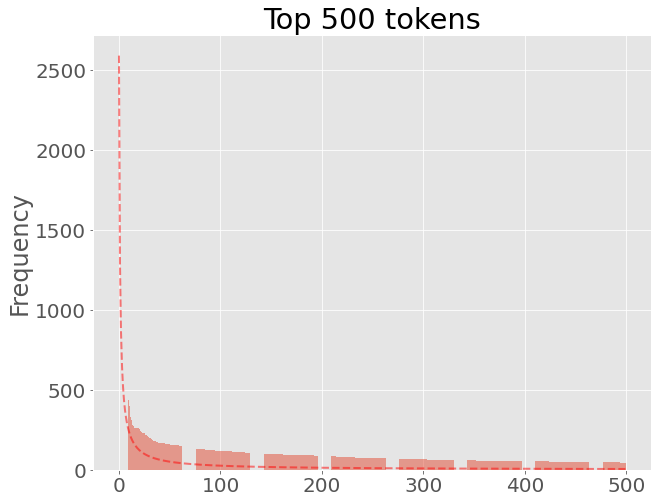

In [50]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='frequency', ascending=False)['frequency'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='frequency', ascending=False)['frequency'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens')

We first build a feature extraction method that takes raw texts as input and runs builds features on the whole dataset (so that we have the feature vector input for the machine learning).

In [52]:
import gensim
from tqdm import tqdm
from sklearn.model_selection import train_test_split as split
import numpy as np

def vectorize_to_bow(tr_data, tst_data):
    
    tr_vectors = X.transform(tr_data) # to transform the data into numerical values (or encoding vectors for the machine larning.)
    
    tst_vectors = X.transform(tst_data)
    return tr_vectors, tst_vectors

def get_features_and_labels(data, labels): # to import the data and the corresponding for the data
    
    # distinguish which is the dataset and which is the label for training stage,
    # and which is the dataset and which is the label for test stage
    # by default, we use 70% of dataset for the training and 30% for the test stage.
    tr_data,tst_data,tr_labels,tst_labels = split(data,labels, test_size=0.3, random_state=1234)
    
    tst_vecs = []
    tr_vecs = []
    tr_vecs, tst_vecs = vectorize_to_bow(tr_data, tst_data)    
    return tr_vecs, tr_labels, tst_vecs, tst_labels

In [53]:
tr_vecs, tr_labels, tst_vecs, tst_labels = get_features_and_labels(train_data.title, train_data.label)

In [54]:
tr_vecs.shape # 10000: the X.vocabulary_ size (the number of columns in each row vector)
# 16800 row vectors.

(16800, 10000)

<h2 id="Machine-Learning">Machine Learning</h2>
<ul>
<li>We have a datasets with labels</li>
<li>We can train a machine learning algorithm using the labels as "gold" data - <span style="color: #e03e2d;">Supervised learning</span></li>
<li>The algorithm will predict unseen data points using the trained model</li>
<li>We will use <a href="https://scikit-learn.org/stable/" target="_blank" rel="noopener">sklearn</a> for the models</li>
</ul>

### Logistic Regression
- One of the simplest method for classification tasks

![lr](https://www.equiskill.com/wp-content/uploads/2018/07/WhatsApp-Image-2020-02-11-at-8.30.11-PM.jpeg)

In [55]:
#Import a bunch of stuff from sklearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr  = LogisticRegression(n_jobs=-1)

In [58]:
lr.fit(tr_vecs, tr_labels) # much simpler trained model with fewer data compared to deep learning, but less accurate

LogisticRegression(n_jobs=-1)

In [57]:
!pip install eli5
import eli5 # eli5 : explain 5 
eli5.show_weights(lr, feature_names=X.get_feature_names()) # lr: logistic regression was trained.
# visualize the weight for each feature
# Y= 1 : world category
# Y=2: sport category .. 

     |████████████████████████████████| 106 kB 2.1 MB/s eta 0:00:01


In [59]:
from sklearn.metrics import accuracy_score
print(type(tst_vecs))

lr_pred = lr.predict(tst_vecs)
print("Logistic Regression Test accuracy : {}".format(accuracy_score(tst_labels, lr_pred)))

<class 'scipy.sparse.csr.csr_matrix'>
Logistic Regression Test accuracy : 0.8218055555555556


Bag of words are the simplest method for featurizing your data. If we want a more sophisticated method, we could use [TF-IDf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

- __TF__: The term frequency of a word in a document. 
- __IDF__: The inverse document frequency of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is.
- The higher the score, the more relevant that word is in that particular document


![tfidf](https://miro.medium.com/max/700/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

_(image from [link](https://miro.medium.com))_

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, use_idf=True)
vectors = vectorizer.fit(train_data.title)

tfidf_vectorizer_vectors = vectors.transform(train_data.title)

In [61]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[6] 
 
# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vectors.get_feature_names(), columns=["tfidf"]) 
df = df.sort_values(by=["tfidf"],ascending=False)
df

,tfidf
london,0.780606
plans,0.625024
000,0.000000
prime,0.000000
possible,0.000000
...,...
from,0.000000
fuel,0.000000
fund,0.000000
funds,0.000000


Sklearn allows us to build [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with defining each step of the pipeline, like:
- Vectorizers
- Classifiers
- Voting strategies
- Optionally merge feature extraction from multiple sources

## Problems
- When representing words with id's we assign them to the words in the order of the encounter. 
- This means that we may assign different vectors to the words each time we run the algorithm.
- Doesn't include any concept of similarity (similarity between words), e.g: `similarity(embedding(cat, dog)) > similarity(embedding(cat, computer))`
- The representation is very sparse and could have very high dimension, which would also slow the computations. The size is given by the vocabulary of our corpus, that can be over 100000 dimension. (10000) is too big for our memory

## Word embeddings

- map each word to a small dimensional (around 100-300) continuous vectors.
- this means that similar words should have similar vectors.
    - what do we mean by word similarity ?
    
    
### Cosine similarity

- Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

![image.png](https://cmry.github.io/sources/eucos.png)

<h2 id="Creating-word-embeddings">Creating word embeddings</h2>
<p>"a word is characterized by the company it keeps" -- popularized by <em>John Rupert Firth</em></p>
<ul>
<li>A popular theory is that words are as similar as their context is</li>
    if words are usually used in a similar context, they are more similar to each other.
<li>Word embeddings are also created with neural networks that predicts the word's context from the word itself</li>
</ul>
<p>To create word embeddings, a neural network is trained to perform the tasks. But then it is not used actually for the task it was trained it on. The goal is actually to learn the weights of the hidden layer. Then, these weights will be our vectors called "word embeddings".</p>
<p><strong>Neural Network?</strong></p>
<p>Instead of computing the actual angle, we can leave the similarity in terms of <span class="MathJax_Preview" style="color: inherit;"><span id="MJXp-Span-73" class="MJXp-math"><span id="MJXp-Span-74" class="MJXp-mi MJXp-italic">s</span><span id="MJXp-Span-75" class="MJXp-mi MJXp-italic">i</span><span id="MJXp-Span-76" class="MJXp-mi MJXp-italic">m</span><span id="MJXp-Span-77" class="MJXp-mi MJXp-italic">i</span><span id="MJXp-Span-78" class="MJXp-mi MJXp-italic">l</span><span id="MJXp-Span-79" class="MJXp-mi MJXp-italic">a</span><span id="MJXp-Span-80" class="MJXp-mi MJXp-italic">r</span><span id="MJXp-Span-81" class="MJXp-mi MJXp-italic">i</span><span id="MJXp-Span-82" class="MJXp-mi MJXp-italic">t</span><span id="MJXp-Span-83" class="MJXp-mi MJXp-italic">y</span><span id="MJXp-Span-84" class="MJXp-mo" style="margin-left: 0.333em; margin-right: 0.333em;">=</span><span id="MJXp-Span-85" class="MJXp-mi MJXp-italic">c</span><span id="MJXp-Span-86" class="MJXp-mi MJXp-italic">o</span><span id="MJXp-Span-87" class="MJXp-mi MJXp-italic">s</span><span id="MJXp-Span-88" class="MJXp-mo" style="margin-left: 0em; margin-right: 0em;">(</span><span id="MJXp-Span-89" class="MJXp-mi">&Theta;</span><span id="MJXp-Span-90" class="MJXp-mo" style="margin-left: 0em; margin-right: 0em;">)</span></span></span>. Formally the <a href="https://en.wikipedia.org/wiki/Cosine_similarity" target="_blank" rel="noopener">Cosine Similarity</a> <span class="MathJax_Preview" style="color: inherit;"><span id="MJXp-Span-91" class="MJXp-math"><span id="MJXp-Span-92" class="MJXp-mi MJXp-italic">s</span></span></span> between two vectors <span class="MathJax_Preview" style="color: inherit;"><span id="MJXp-Span-93" class="MJXp-math"><span id="MJXp-Span-94" class="MJXp-mi MJXp-italic">p</span></span></span> and <span class="MathJax_Preview" style="color: inherit;"><span id="MJXp-Span-95" class="MJXp-math"><span id="MJXp-Span-96" class="MJXp-mi MJXp-italic">q</span></span></span> is defined as:</p>
<p><span class="MathJax_Preview" style="color: inherit;"><span id="MJXp-Span-97" class="MJXp-math MJXp-display"><span id="MJXp-Span-98" class="MJXp-mi MJXp-italic">s</span><span id="MJXp-Span-99" class="MJXp-mo" style="margin-left: 0.333em; margin-right: 0.333em;">=</span><span id="MJXp-Span-100" class="MJXp-mfrac" style="vertical-align: 0.25em;"><span class="MJXp-box"><span id="MJXp-Span-101" class="MJXp-mi MJXp-italic">p</span><span id="MJXp-Span-102" class="MJXp-mo" style="margin-left: 0.267em; margin-right: 0.267em;">&sdot;</span><span id="MJXp-Span-103" class="MJXp-mi MJXp-italic">q</span></span><span class="MJXp-box" style="margin-top: -0.9em;"><span class="MJXp-denom"><span class="MJXp-box"><span id="MJXp-Span-104" class="MJXp-mrow"><span id="MJXp-Span-105" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-106" class="MJXp-mrow"><span id="MJXp-Span-107" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-108" class="MJXp-mi MJXp-italic">p</span><span id="MJXp-Span-109" class="MJXp-mrow"><span id="MJXp-Span-110" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-111" class="MJXp-mrow"><span id="MJXp-Span-112" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-113" class="MJXp-mrow"><span id="MJXp-Span-114" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-115" class="MJXp-mrow"><span id="MJXp-Span-116" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-117" class="MJXp-mi MJXp-italic">q</span><span id="MJXp-Span-118" class="MJXp-mrow"><span id="MJXp-Span-119" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span><span id="MJXp-Span-120" class="MJXp-mrow"><span id="MJXp-Span-121" class="MJXp-mo" style="margin-left: 0.167em; margin-right: 0.167em;">|</span></span></span></span></span></span><span id="MJXp-Span-122" class="MJXp-mo" style="margin-left: 0em; margin-right: 0.222em;">,</span><span id="MJXp-Span-123" class="MJXp-mrow"><span id="MJXp-Span-124" class="MJXp-mtext">&nbsp;where&nbsp;</span></span><span id="MJXp-Span-125" class="MJXp-mi MJXp-italic">s</span><span id="MJXp-Span-126" class="MJXp-mo" style="margin-left: 0.333em; margin-right: 0.333em;">&isin;</span><span id="MJXp-Span-127" class="MJXp-mo" style="margin-left: 0em; margin-right: 0em;">[</span><span id="MJXp-Span-128" class="MJXp-mo" style="margin-left: 0.267em; margin-right: 0.267em;">&minus;</span><span id="MJXp-Span-129" class="MJXp-mn">1</span><span id="MJXp-Span-130" class="MJXp-mo" style="margin-left: 0em; margin-right: 0.222em;">,</span><span id="MJXp-Span-131" class="MJXp-mn">1</span><span id="MJXp-Span-132" class="MJXp-mo" style="margin-left: 0em; margin-right: 0em;">]</span></span></span></p>
if they are close to 1, they are more similar
if they are close to 0, they are much less similar.

## Creating word embeddings 2

Word embeddings are learned with neural networks. The target can be:

- Tries to predict the word given the context - The Continous Bag Of Words model (CBOW)
- Tries to predict the context given a words - The SkipGram model

The training examples are generated from big text corpora. For example from the sentence “The quick brown fox jumps over the lazy dog.” we can generate the following inputs:

![training examples](http://mccormickml.com/assets/word2vec/training_data.png)

To do this, we first build a vocabulary of words from our training documents–let’s say we have a vocabulary of 10,000 unique words. The vocabulary of big corporas can be much more then 10,000 unique words, to handle them we usually substitute rare words with a special token (this is usually the _UNK_ token).

First we build the vocabulary of our documents, then for representing words, we will use one-hot vectors. The output of the network will be a single vector that contains the probabilities for the "nearby" words.

### Famous static word embeddings for English

- [Word2vec](https://arxiv.org/pdf/1301.3781.pdf)
- [GLOVE](https://nlp.stanford.edu/projects/glove/)

### Contextual embeddings?

- [Elmo](https://allennlp.org/elmo)
- [BERT](https://arxiv.org/abs/1810.04805)
- [Flair](https://www.aclweb.org/anthology/N19-4010/)

For static embeddings, we will use a GLOVE embedding of 100 dimensional vectors trained on 6B tokens.

[Download GLOVE](http://sandbox.hlt.bme.hu/~adaamko/glove.6B.100d.txt)

# Using word embeddings

As we discussed, more recently prediction-based word vectors have demonstrated better performance, such as word2vec and GloVe (which also utilizes the benefit of counts). Here, we shall explore the embeddings produced by GloVe. If you want to know more about embeddings, try reading [GloVe's original paper](https://nlp.stanford.edu/pubs/glove.pdf).

In [62]:
embedding_file = "glove.6B.100d.txt"

embedding = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False) # read in the weights of wrods in a dictionary for us to access; similar words are mapped close to each other.

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

In [ ]:
dog_vector = embedding["dog"]
dog_vector.shape

In [ ]:
embedding.most_similar("president")

In [ ]:
embedding.most_similar(positive=['woman', 'king'], negative=['man'])

In [ ]:
embedding.similarity("woman", "computer")

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def tsne_plot(model, size=500):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for i, word in enumerate(model.wv.vocab):
        if len(tokens) > size:
            break
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(embedding, 100)

## Analogies

In [ ]:
def analogy(word1, word2, word3, n=5):
    
    #get vectors for each word
    word1_vector = embedding[word1]
    word2_vector = embedding[word2]
    word3_vector = embedding[word3]
    
    #calculate analogy vector
    analogy_vector = embedding.most_similar(positive=[word3, word2], negative=[word1])
    
    print(word1 + " is to " + word2 + " as " + word3 + " is to...")
    
    return analogy_vector

In [ ]:
analogy('man', 'king', 'woman')

## Spacy also has pretrained embeddings!

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

doc = nlp("man woman")
cosine_similarity(doc[0].vector.reshape(1, -1), doc[1].vector.reshape(1, -1))

__Or with using the built in similarity function:__

In [ ]:
nlp("My name is adam").similarity(nlp("My name is andrea"))

## Contextual embeddings

In GloVe and Word2vec representations, words have a static representation. But words can have different meaning in different contexts, e.g. the word "stick":

1. Find some dry sticks and we'll make a campfire.
2. Let's stick with glove embeddings.

![elmo](http://jalammar.github.io/images/elmo-embedding-robin-williams.png)

_(Peters et. al., 2018 in the ELMo paper)_

In [ ]:
# The sentence objects holds a sentence that we may want to embed or tag
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# create a sentence
sentence1 = Sentence("Find some dry sticks and we'll make a campfire.")
sentence2 = Sentence("Let's stick with glove embeddings.")

# embed words in sentence
flair_embedding_forward.embed(sentence2)
for token in sentence2:
    print(token)
    print(token.embedding)

In Flair, a pretrained NER tagger is also available for use